# Project : World Population Analysis

## Introduction

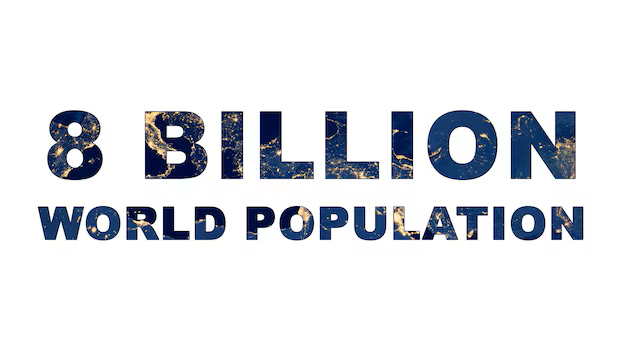

In [1]:
from IPython.display import Image
Image(filename="C:/Users/sunde/OneDrive/Desktop/project/P.png")

## Objective 

### To analyze global population trends, compare regional distributions, examine demographic factors, identify growth drivers, and present insights through visualizations and statistical analysis to inform policy-making and predict future population changes effectively.

## Importing required libraries 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading dataset

In [3]:
df=pd.read_csv('C:/Users/sunde/OneDrive/Desktop/project/World Population.csv')

In [4]:
df

,Country,Population 2024,Population 2023,Area (km2),Density (/km2),Growth Rate,World %,World Rank
0,India,1441719852,1428627663,3M,485.00,0.0092,0.1801,1
1,China,1425178782,1425671352,9.4M,151.00,-0.0003,0.1780,2
2,United States,341814420,339996563,9.1M,37.00,0.0053,0.0427,3
3,Indonesia,279798049,277534122,1.9M,149.00,0.0082,0.0350,4
4,Pakistan,245209815,240485658,770.9K,318.00,0.0196,0.0306,5
...,...,...,...,...,...,...,...,...
229,Montserrat,4372,4386,102,43.00,-0.0032,NaN,230
230,Falkland Islands,3803,3791,12.2K,0.31,0.0032,NaN,231
231,Niue,1935,1935,261,7.00,0.0000,NaN,232
232,Tokelau,1915,1893,10,192.00,0.0116,NaN,233


### Checking some terms like shape , dim, rows , columns

In [5]:
df.shape

(234, 8)

In [6]:
df.ndim

2

In [7]:
df.columns


Index(['Country', 'Population 2024', 'Population 2023', 'Area (km2)',
       'Density (/km2)', 'Growth Rate', 'World %', 'World Rank'],
      dtype='object')

In [8]:
#Using head method
df.head()

,Country,Population 2024,Population 2023,Area (km2),Density (/km2),Growth Rate,World %,World Rank
0,India,1441719852,1428627663,3M,485.0,0.0092,0.1801,1
1,China,1425178782,1425671352,9.4M,151.0,-0.0003,0.1780,2
2,United States,341814420,339996563,9.1M,37.0,0.0053,0.0427,3
3,Indonesia,279798049,277534122,1.9M,149.0,0.0082,0.0350,4
4,Pakistan,245209815,240485658,770.9K,318.0,0.0196,0.0306,5


In [9]:
#Using tail method
df.tail()

,Country,Population 2024,Population 2023,Area (km2),Density (/km2),Growth Rate,World %,World Rank
229,Montserrat,4372,4386,102,43.00,-0.0032,NaN,230
230,Falkland Islands,3803,3791,12.2K,0.31,0.0032,NaN,231
231,Niue,1935,1935,261,7.00,0.0000,NaN,232
232,Tokelau,1915,1893,10,192.00,0.0116,NaN,233
233,Vatican City,526,518,< 1,1195.00,0.0154,NaN,234


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          234 non-null    object 
 1   Population 2024  234 non-null    int64  
 2   Population 2023  234 non-null    int64  
 3   Area (km2)       234 non-null    object 
 4   Density (/km2)   234 non-null    float64
 5   Growth Rate      234 non-null    float64
 6   World %          228 non-null    float64
 7   World Rank       234 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 14.8+ KB


### Let's check that is there some null values or not

In [11]:
df.isnull().sum()

Country            0
Population 2024    0
Population 2023    0
Area (km2)         0
Density (/km2)     0
Growth Rate        0
World %            6
World Rank         0
dtype: int64

### Now, we will replace null to 0 in World % column

In [12]:
df.fillna(0,inplace=True)

In [13]:
df.isnull().sum()

Country            0
Population 2024    0
Population 2023    0
Area (km2)         0
Density (/km2)     0
Growth Rate        0
World %            0
World Rank         0
dtype: int64

### Now we will drop column 'World Rank'

In [14]:
df=df.drop(['World Rank'],axis=1)

In [15]:
df

,Country,Population 2024,Population 2023,Area (km2),Density (/km2),Growth Rate,World %
0,India,1441719852,1428627663,3M,485.00,0.0092,0.1801
1,China,1425178782,1425671352,9.4M,151.00,-0.0003,0.1780
2,United States,341814420,339996563,9.1M,37.00,0.0053,0.0427
3,Indonesia,279798049,277534122,1.9M,149.00,0.0082,0.0350
4,Pakistan,245209815,240485658,770.9K,318.00,0.0196,0.0306
...,...,...,...,...,...,...,...
229,Montserrat,4372,4386,102,43.00,-0.0032,0.0000
230,Falkland Islands,3803,3791,12.2K,0.31,0.0032,0.0000
231,Niue,1935,1935,261,7.00,0.0000,0.0000
232,Tokelau,1915,1893,10,192.00,0.0116,0.0000


### let's check the data types of columns

In [16]:
df.dtypes

Country             object
Population 2024      int64
Population 2023      int64
Area (km2)          object
Density (/km2)     float64
Growth Rate        float64
World %            float64
dtype: object

## Here are all columns with numeric data type

In [17]:
cols=df.loc[:, (df.dtypes == np.int64) | (df.dtypes == np.float64)]

In [18]:
cols

,Population 2024,Population 2023,Density (/km2),Growth Rate,World %
0,1441719852,1428627663,485.00,0.0092,0.1801
1,1425178782,1425671352,151.00,-0.0003,0.1780
2,341814420,339996563,37.00,0.0053,0.0427
3,279798049,277534122,149.00,0.0082,0.0350
4,245209815,240485658,318.00,0.0196,0.0306
...,...,...,...,...,...
229,4372,4386,43.00,-0.0032,0.0000
230,3803,3791,0.31,0.0032,0.0000
231,1935,1935,7.00,0.0000,0.0000
232,1915,1893,192.00,0.0116,0.0000


### Let me check the count mean median min max etc 

In [19]:
df.describe()

,Population 2024,Population 2023,Density (/km2),Growth Rate,World %
count,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000
mean,3.468862e+07,3.437442e+07,453.788248,0.009200,0.004332
std,1.380750e+08,1.373864e+08,1990.163274,0.011371,0.017247
min,5.260000e+02,5.180000e+02,0.140000,-0.030900,0.000000
25%,4.264565e+05,4.225982e+05,39.500000,0.001925,0.000100
50%,5.626359e+06,5.643895e+06,98.500000,0.007950,0.000700
75%,2.392272e+07,2.324537e+07,248.250000,0.015675,0.003000
max,1.441720e+09,1.428628e+09,21674.000000,0.048300,0.180100


### Here we can see that our data in dataset have some values to out of range.These are called outliers. In these type of cases we  have to remove them by using IQR(inter quartile range )method . Let me show you first in graphs.

## EDA(Exploratory Data Analysis):

### Here is the boxplot for 'Density feature'

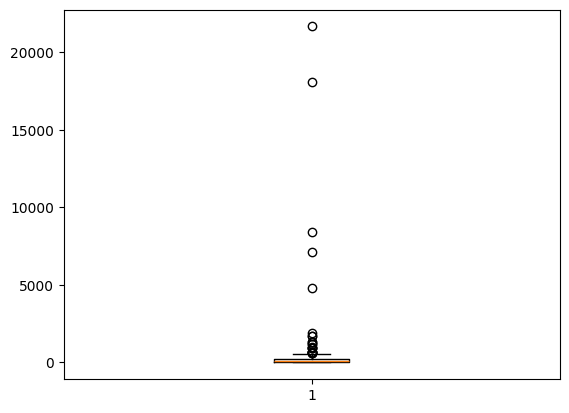

In [20]:
plt.boxplot(df['Density (/km2)'])
plt.show()

### Here as you see that we got some values beyond 20000 . So these values are called outliers. Because there are away from the normal values. Now we have detect the outliers of the feature of Density. Similarly we will checking of anothers features 

### Population 2024 feature graph

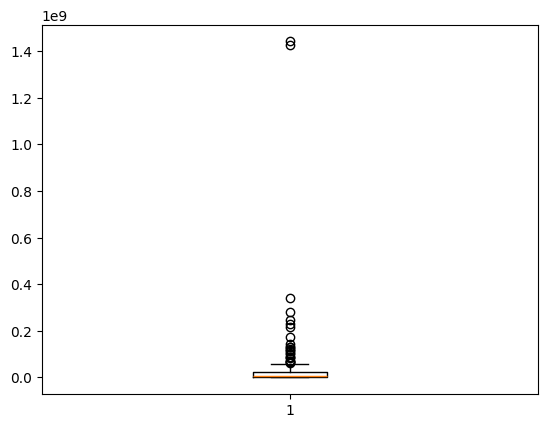

In [21]:
plt.boxplot(df['Population 2024'])
plt.show()

### Population 2023 feature graph

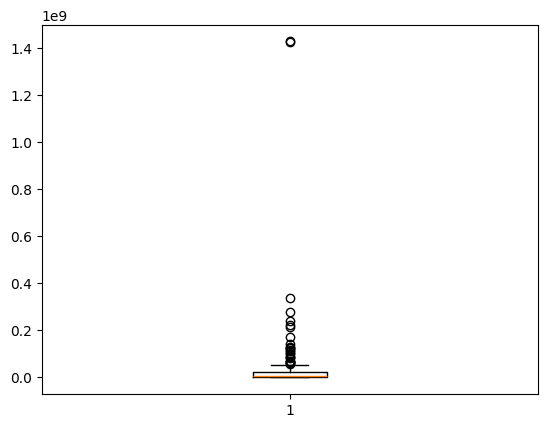

In [22]:
plt.boxplot(df['Population 2023'])
plt.show()

### Growth rate feature graph

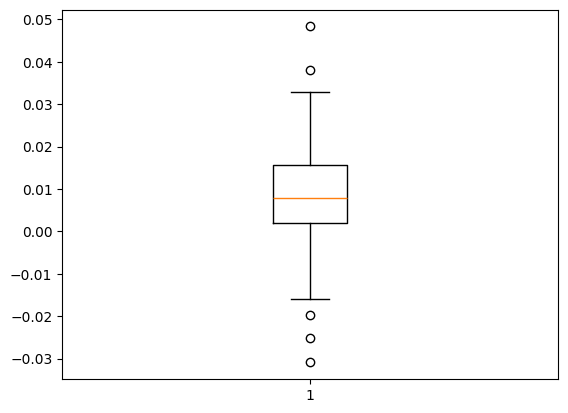

In [23]:
plt.boxplot(df['Growth Rate'])
plt.show()

## Here we can see that boxplot show the proper distribution of 25 percentile and 75 percentile of the feature of Growth Rate

## But, As we know that,it is world population data so we will not remove any outliers because like population ,density these can we of wide range,like population in crores. so that it.

## Visualization Part

### Top 10 country with more population in 2024

Text(0, 0.5, 'Country Population')

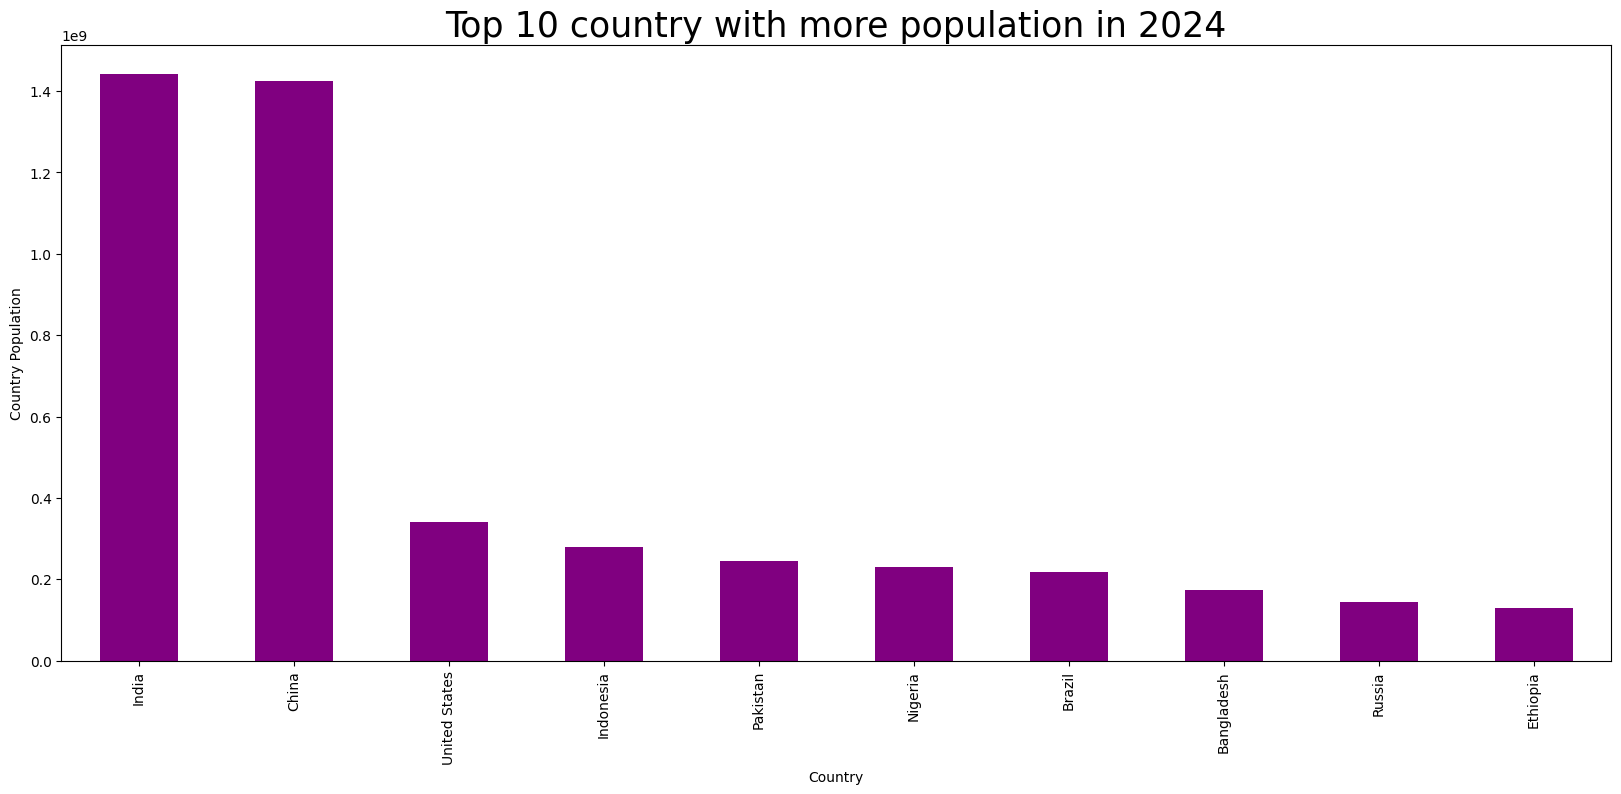

In [24]:
plt.figure(figsize=(20,8))
df.groupby('Country')["Population 2024"].sum().sort_values(ascending=False).head(10).plot(kind='bar',color='purple')
plt.title('Top 10 country with more population in 2024', size=25)
plt.ylabel('Country Population')

###  Here we can see that the highest populated country is India with having population around 1.44 Billion
###  And China have around 1.42 Billion

### Top 10 country with more population in 2023

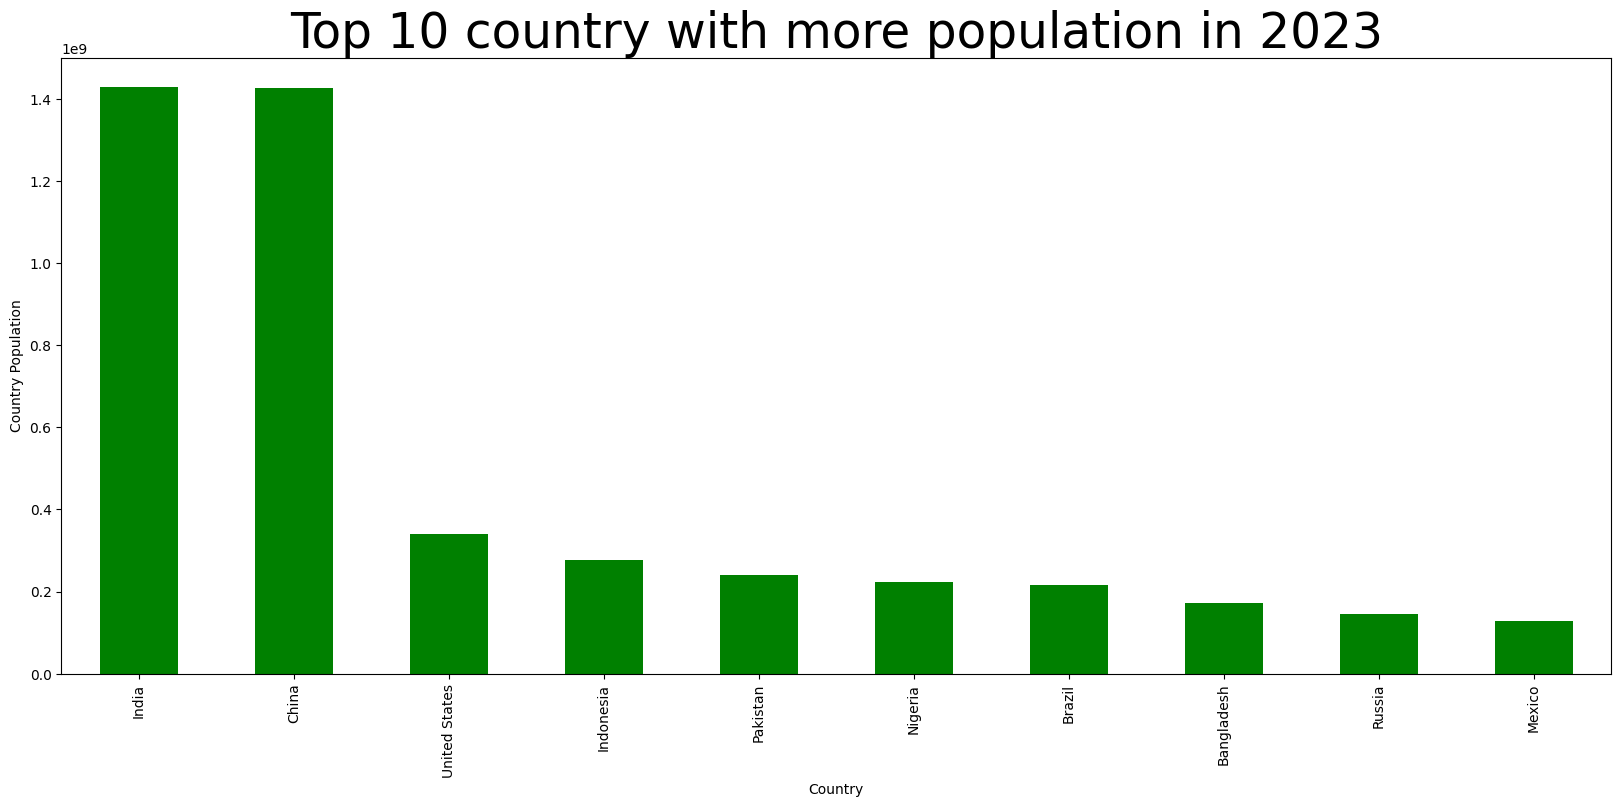

In [25]:
plt.figure(figsize=(20,8))
df.groupby('Country')["Population 2023"].sum().sort_values(ascending=False).head(10).plot(kind='bar',color='green')
plt.title('Top 10 country with more population in 2023', size=35)
plt.ylabel('Country Population')
plt.show()

### Here we can see that the population are around same of India And China in 2023.
### here is the Population India- 1.4286 billion, China- 1.4256 billion

### Top 10 Country having highest growth rate

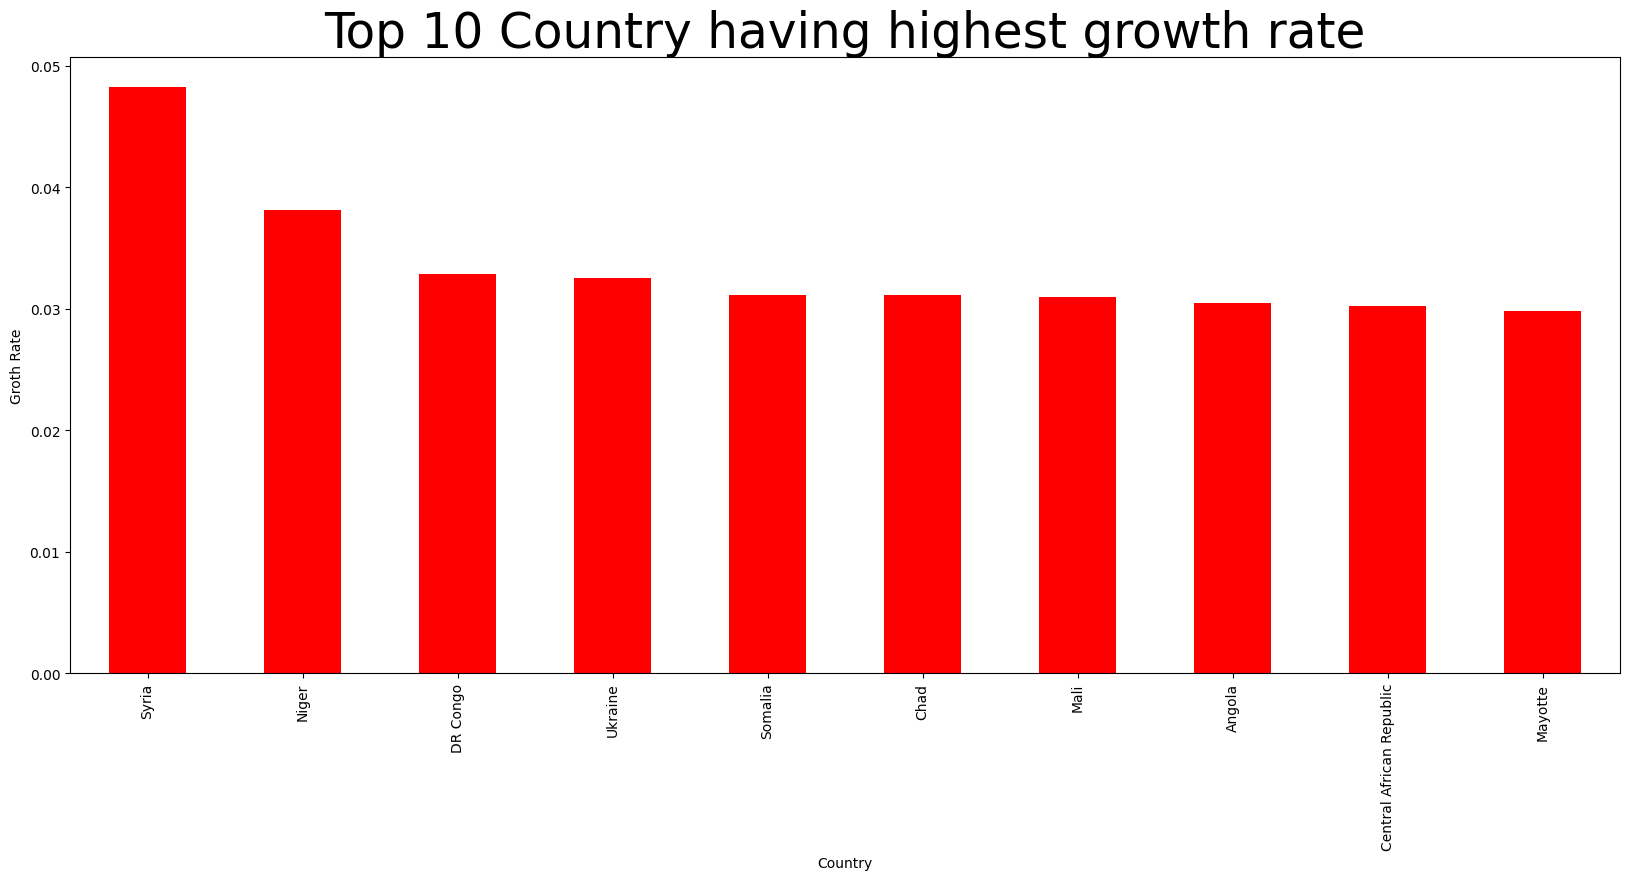

In [26]:
plt.figure(figsize=(20,8))
df.groupby('Country')["Growth Rate"].sum().sort_values(ascending=False).head(10).plot(kind='bar',color='red')
plt.title('Top 10 Country having highest growth rate', size=35)
plt.ylabel('Groth Rate')
plt.show()

### Here's what we see that Syria is the highest Growth Rate Country 

### As we saw in above population graphs that India is the Most Populated Country. But in terms of Growth Rate it is not.

### Now, we will see the country across world %

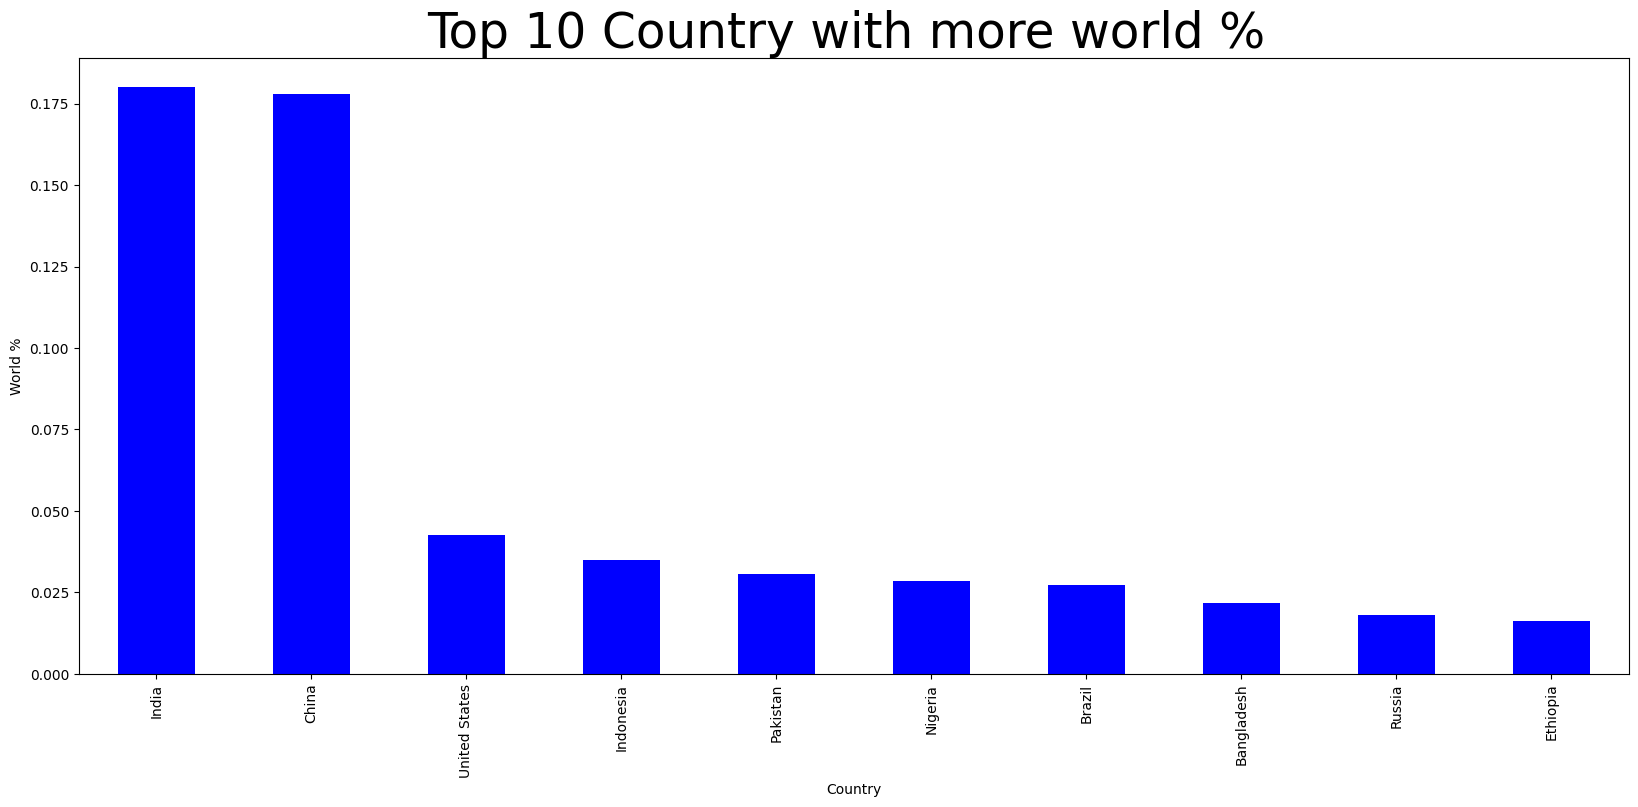

In [27]:
plt.figure(figsize=(20,8))
df.groupby('Country')["World %"].sum().sort_values(ascending=False).head(10).plot(kind='bar',color='blue')
plt.title('Top 10 Country with more world % ', size=35)
plt.ylabel('World %')
plt.show()

### Here it is, India which is most populated country in terms of population in world population %

## Conclusion:

### Here we got that , As we saw that the Population of India grew more than China from 2023 to 2024 i.e., from 1.42 Billion to 1.44 Billion . And of China is from 1.4251 Billion to 1.4256 Billion.
### In India, Government have not taken any strict action or not made any strict law against to not having more children. And not releasing any strict guidlines against for parents should not have more than two child .
### On the other hand, In China , The Government taken more strict action towards child birth that is for parents should not have more than one/two child . But , the government recently announced that families can now have as many children as they like without facing fines or other consequences. This marks a significant change from the previous policies of limiting families to either one or two children. This may effect to increase the population of China in next coming years .
### But Currently, It is India which is the most populated country around 1.46 Billion in 2025.
### And China's current population is 1.41 Billion

### And in terms of growth rate Its Syria having growth rate 4.98% .